# ClusterExplorer: Explaining Black-Box Clustering Pipelines

This notebook shows a demo of Cluster-Explorer after the clustering pipeline. The dataset is available here: "https://archive.ics.uci.edu/dataset/186/wine+quality". 
<br> This dataset describes wine quality based on physicochemical tests.


## Imports

In [129]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from explainer import Explainer
import warnings
warnings.filterwarnings("ignore")

## Clustering pipeline

In [132]:
file_path = 'wine-qualityred.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter=';')
pd.set_option('display.max_colwidth', None)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [133]:
X = df.drop('quality', axis=1)

In [146]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [136]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
clusters =pd.Series(data=clusters)

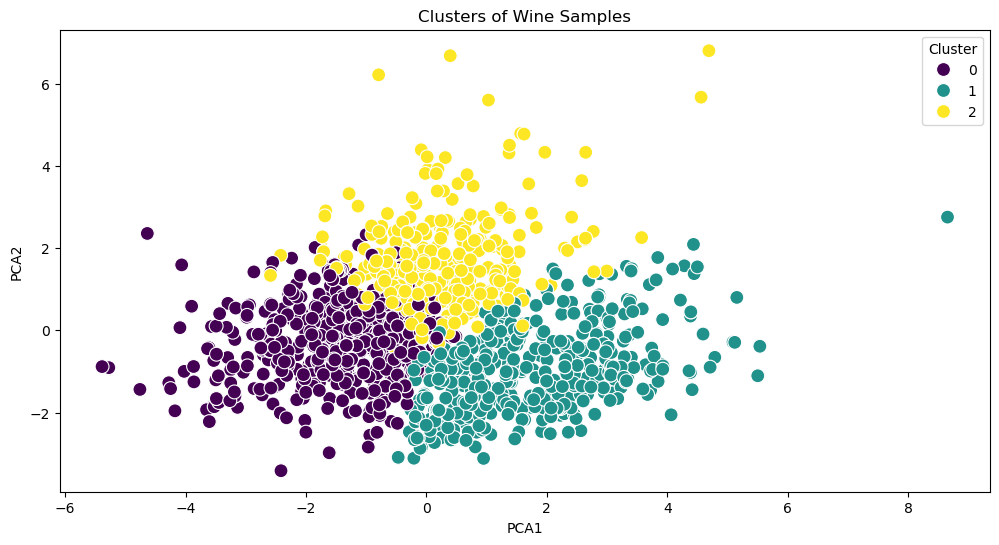

In [137]:
data = X.copy()
data['Cluster'] = clusters

# Evaluation and Visualization
# 1. PCA for 2D visualization
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# 2. Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Wine Samples')
plt.show()

## Clusters explanation

We just need to initialize the explainer with the original data and the clusters, and then call the generate_explanations function on the explainer object.

In [142]:
explainer = Explainer(X, clusters)
df_cluster_explore = explainer.generate_explanations(
    coverage_threshold=0.8,
    conciseness_threshold=0.2,
    separation_threshold=0.2,
    p_value=int((1 / 0.2))
)

### Cluster 0

In [143]:
df_cluster_explore[df_cluster_explore.Cluster == 0]

,rule,coverage,separation_err,conciseness,Cluster
0,"[[['citric acid', '>=', 0.0], ['and'], ['citric acid', '<=', 0.25], ['and'], ['total sulfur dioxide', '>=', 6.0], ['and'], ['total sulfur dioxide', '<=', 76.75]]]",0.82,0.12,0.50,0
1,"[[['citric acid', '>=', 0.0], ['and'], ['citric acid', '<=', 0.3333333333333333], ['and'], ['total sulfur dioxide', '>=', 6.0], ['and'], ['total sulfur dioxide', '<=', 62.6]]]",0.87,0.15,0.50,0
2,"[[['citric acid', '>=', 0.0], ['and'], ['citric acid', '<=', 0.26], ['and'], ['total sulfur dioxide', '>=', 6.0], ['and'], ['total sulfur dioxide', '<=', 76.75]]]",0.83,0.13,0.50,0
3,"[[['citric acid', '>=', 0.0], ['and'], ['citric acid', '<=', 0.26], ['and'], ['total sulfur dioxide', '>=', 6.0], ['and'], ['total sulfur dioxide', '<=', 62.6]]]",0.80,0.09,0.50,0
4,"[[['citric acid', '>=', 0.0], ['and'], ['citric acid', '<=', 0.3333333333333333], ['and'], ['total sulfur dioxide', '>=', 6.0], ['and'], ['total sulfur dioxide', '<=', 53.166666666666664], ['and'], ['fixed acidity', '>=', 4.6], ['and'], ['fixed acidity', '<=', 10.25]]]",0.81,0.11,0.33,0


### Cluster 1

In [144]:
df_cluster_explore[df_cluster_explore.Cluster == 1]

,rule,coverage,separation_err,conciseness,Cluster
6,"[[['citric acid', '>=', 0.33500000834465027], ['and'], ['citric acid', '<=', 1.0], ['and'], ['total sulfur dioxide', '>=', 6.0], ['and'], ['total sulfur dioxide', '<=', 62.6]]]",0.81,0.12,0.5,1
7,"[[['citric acid', '>=', 0.33500000834465027], ['and'], ['citric acid', '<=', 1.0], ['and'], ['total sulfur dioxide', '>=', 6.0], ['and'], ['total sulfur dioxide', '<=', 76.75]]]",0.86,0.16,0.5,1


### Cluster 2

In [145]:
df_cluster_explore[df_cluster_explore.Cluster == 2]

,rule,coverage,separation_err,conciseness,Cluster
5,"[[['total sulfur dioxide', '>=', 57.5], ['and'], ['total sulfur dioxide', '<=', 289.0], ['and'], ['pH', '>=', 3.0749999284744263], ['and'], ['pH', '<=', 3.4850000143051147]]]",0.85,0.15,0.5,2
